1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [61]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import linalg as la
%precision 4
%matplotlib inline

In [62]:
#Generate the dataset
N = 2000

x1 = np.random.normal(size = N)
x2 = x1 + np.random.normal(scale = 3, size = N)
x3 = 2*x1+x2

data = np.array([x1, x2, x3])

In [63]:
#Find the eigenvectors and eigenvalues of the covariance matrix of the dataset

covmatrix = np.cov(data)
l, V = np.linalg.eig(covmatrix)

print('The Eigenvalues of the covariance matrix of the dataset are:', l)
print('The Eigenvectors of the covariance matrix of the dataset are: \n', V)

The Eigenvalues of the covariance matrix of the dataset are: [2.7977e+01 1.3234e-15 1.9758e+00]
The Eigenvectors of the covariance matrix of the dataset are: 
 [[-0.1132 -0.8165  0.5661]
 [-0.5801 -0.4082 -0.7048]
 [-0.8066  0.4082  0.4274]]


In [64]:
#Find the eigenvectors and eigenvalues using SVD.

U, spectrum, Vt = np.linalg.svd(data)
eigval_svd = spectrum**2/(N-1)

print('The Eigenvalues with SVD are:', eigval_svd)
print('The Eigenvectors with SVD are:\n', U)

The Eigenvalues with SVD are: [2.8025e+01 1.9764e+00 1.3698e-31]
The Eigenvectors with SVD are:
 [[-0.1134  0.5661 -0.8165]
 [-0.58   -0.7049 -0.4082]
 [-0.8067  0.4273  0.4082]]


In [142]:
#Reduce the dimensionality of the system so that at least 99% of the total variability is retained

Lambda = np.diag(eigval_svd)
print('\nThe Lambda matrix, with eigenvalues on the diagonal is:\n',Lambda)
print('\nThe Lambda trace is: ', Lambda.trace())
print('\nThe Variability (%) of the first component is: ',Lambda[0,0]/Lambda.trace())
print('\nThe Variability (%) of the first two components is: ',(Lambda[0,0]+Lambda[1,1])/Lambda.trace())


The Lambda matrix, with eigenvalues on the diagonal is:
 [[2.8025e+01 0.0000e+00 0.0000e+00]
 [0.0000e+00 1.9764e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 1.3698e-31]]

The Lambda trace is:  30.00168742436344

The Variability (%) of the first component is:  0.9341235138770349

The Variability (%) of the first two components is:  1.0


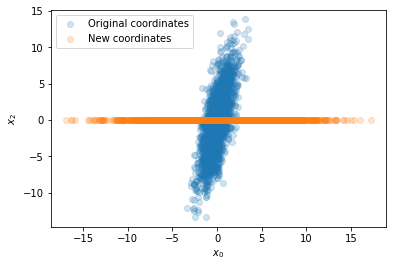

In [67]:
# Redefine the data in the basis yielded by the PCA procedure
# We can do this by rotating all the points 
data_PCA = np.dot(U.T, data)

# Plot the data points in the original and the new coordiantes as a set of scatter plots.
# Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.

plt.figure()
plt.scatter(data[0,:], data[2,:], alpha=0.2, label='Original coordinates')
plt.scatter(data_PCA[0,:], data_PCA[2,:], alpha=0.2, label='New coordinates')
plt.legend()
plt.xlabel('$x_{0}$')
plt.ylabel('$x_{2}$')
plt.show()

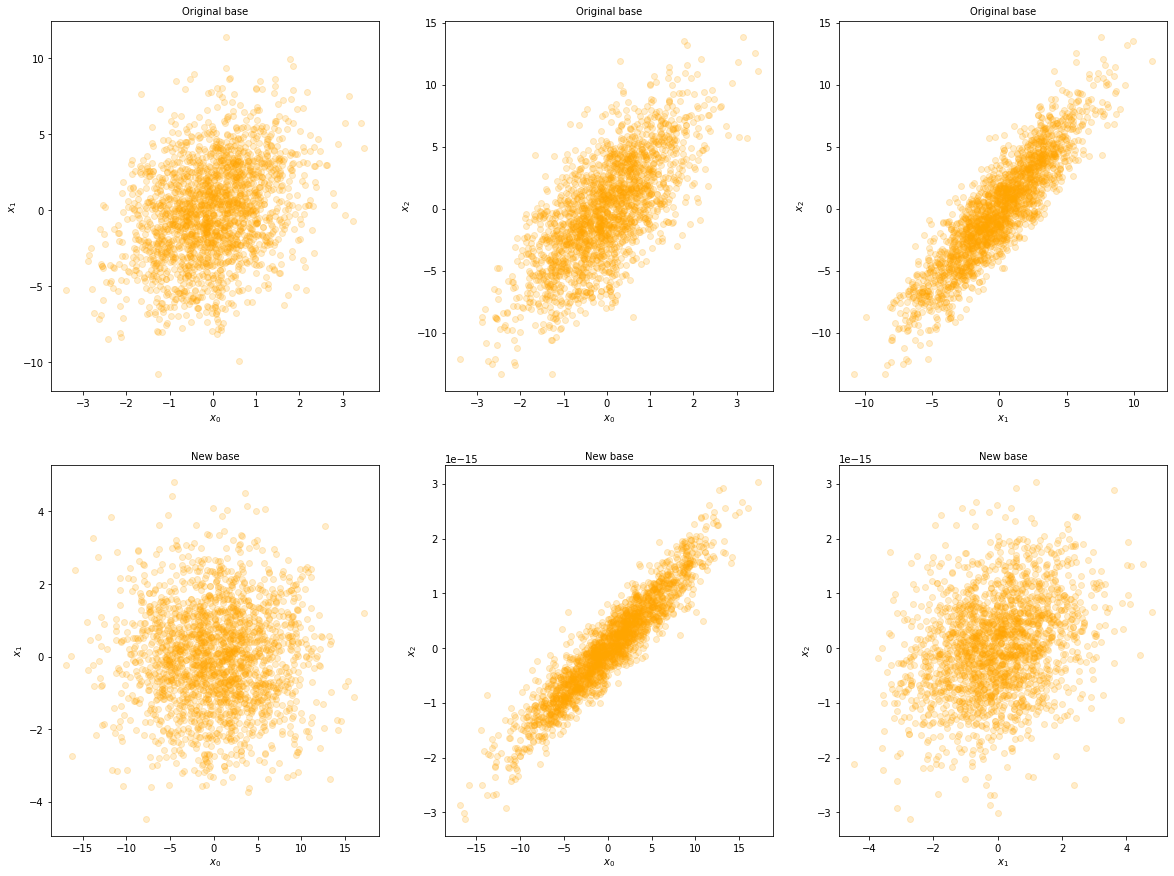

In [68]:
from itertools import combinations

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))

for col,(v1,v2) in enumerate(combinations([0,1,2], 2)):
    axes[0, col].scatter(data[v1,:], data[v2,:], alpha=0.2, c='orange')
    axes[0, col].set_xlabel('$x_{}$'.format(v1))
    axes[0, col].set_ylabel('$x_{}$'.format(v2))
    axes[0, col].set_title('Original base', size=10)
    
for col,(v1,v2) in enumerate(combinations([0,1,2], 2)):
    axes[1, col].scatter(data_PCA[v1,:], data_PCA[v2,:], alpha=0.2, c='orange')
    axes[1, col].set_xlabel('$x_{}$'.format(v1))
    axes[1, col].set_ylabel('$x_{}$'.format(v2))
    axes[1, col].set_title('New base', size=10)

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [30]:
#Dataset from the previous exercise
N = 2000

x1 = np.random.normal(size = N)
x2 = x1 + np.random.normal(scale = 3, size = N)

#Add noise to x1 and x2
for i in range (0,10):
    std1=np.random.uniform(0.01,0.02)
    x1=x1+np.random.normal(0,std1,N)
    std2=np.random.uniform(0.02,0.06)
    x2=x2+np.random.normal(0,std2,N)
    
x3 = 2*x1+x2 
data2 = np.array([x1,x2,x3])

covmatrix2 = np.cov(data2)

#Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
l, V = np.linalg.eig(covmatrix2) 
print('The Eigenvalues of the covariance matrix of the dataset are:', l)
print('The Eigenvectors of the covariance matrix of the dataset are: \n', V)

#Find the eigenvectors and eigenvalues using SVD
U, spectrum, Vt = la.svd(data2)

eigval_svd = spectrum**2/(N-1)
eigvec_svd = U

print('\nThe Eigenvalues with SVD are:', eigval_svd)
print('The Eigenvectors with SVD are: \n', eigvec_svd)

The Eigenvalues of the covariance matrix of the dataset are: [2.8007e+01 2.5627e-17 2.0690e+00]
The Eigenvectors of the covariance matrix of the dataset are: 
 [[-0.1171 -0.8165  0.5654]
 [-0.5753 -0.4082 -0.7087]
 [-0.8095  0.4082  0.422 ]]

The Eigenvalues with SVD are: [2.8009e+01 2.0690e+00 3.2817e-32]
The Eigenvectors with SVD are: 
 [[-0.1171  0.5654 -0.8165]
 [-0.5753 -0.7087 -0.4082]
 [-0.8095  0.422   0.4082]]


In [141]:
#Reduce the dimensionality of the system so that at least 99% of the total variability is retained
Lambda = np.diag(eigval_svd)
print('\nThe Lambda matrix, with eigenvalues on the diagonal is:\n',Lambda)
print('\nThe Lambda trace is: ', Lambda.trace())
print('\nThe Variability (%) of the first component is: ',Lambda[0,0]/Lambda.trace())
print('\nThe Variability (%) of the first two components is: ',(Lambda[0,0]+Lambda[1,1])/Lambda.trace())


The Lambda matrix, with eigenvalues on the diagonal is:
 [[2.8025e+01 0.0000e+00 0.0000e+00]
 [0.0000e+00 1.9764e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 1.3698e-31]]

The Lambda trace is:  30.00168742436344

The Variability (%) of the first component is:  0.9341235138770349

The Variability (%) of the first two components is:  1.0


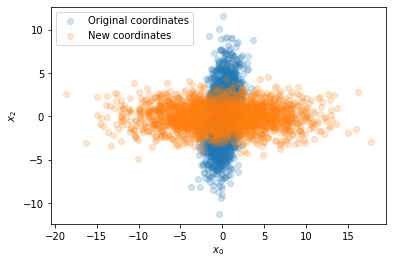

In [32]:
# Redefine the data in the basis yielded by the PCA procedure
# We can do this by rotating all the points 
data_PCA= np.dot(U.T, data2)

# Plot the data points in the original and the new coordiantes as a set of scatter plots.
# Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.

plt.figure()
plt.scatter(data2[0,:], data2[1,:], alpha=0.2, label='Original coordinates')
plt.scatter(data_PCA[0,:], data_PCA[1,:], alpha=0.2, label='New coordinates')
plt.legend()
plt.xlabel('$x_{0}$')
plt.ylabel('$x_{2}$')
plt.show()

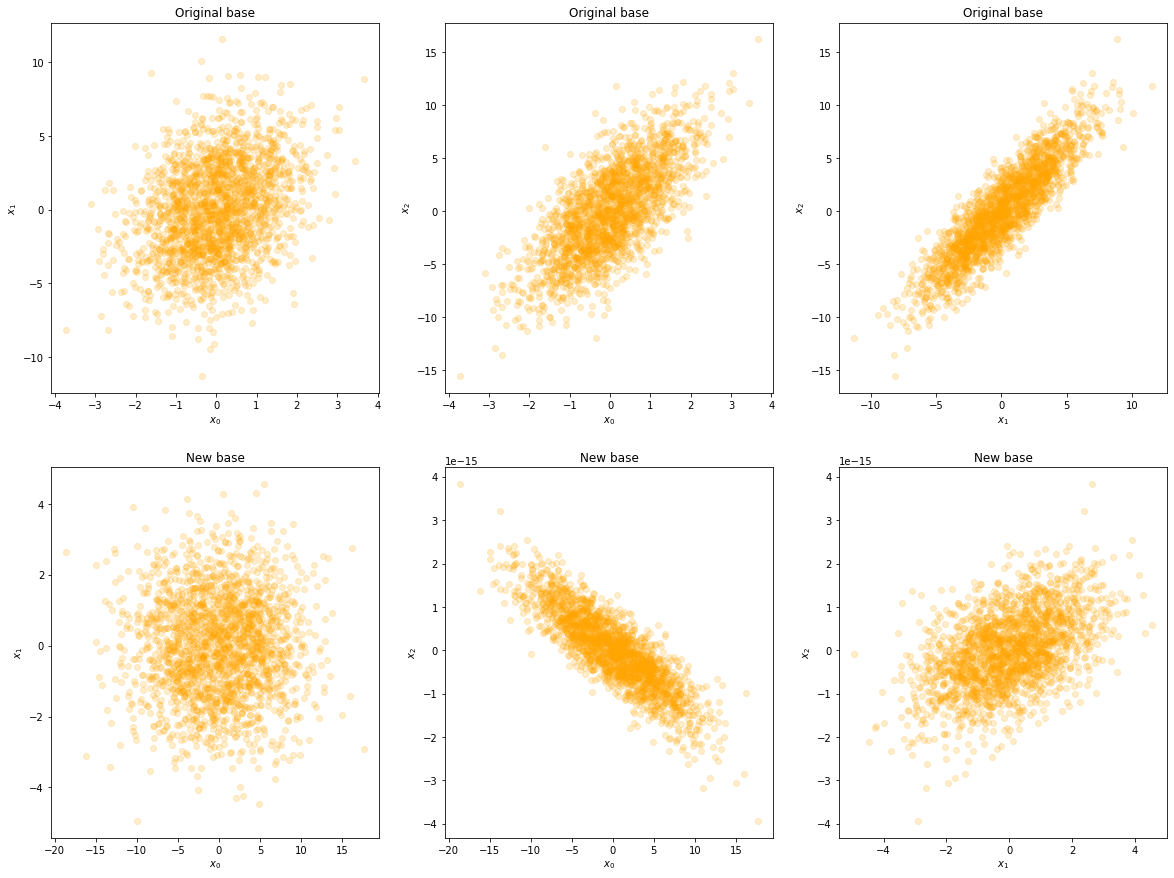

In [54]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))

for col,(v1,v2) in enumerate(combinations([0,1,2], 2)):
    axes[0, col].scatter(data2[v1,:], data2[v2,:], alpha=0.2, c='orange')
    axes[0, col].set_xlabel('$x_{}$'.format(v1))
    axes[0, col].set_ylabel('$x_{}$'.format(v2))
    axes[0, col].set_title('Original base')
    
for col,(v1,v2) in enumerate(combinations([0,1,2], 2)):
    axes[1, col].scatter(data_PCA[v1,:], data_PCA[v2,:], alpha=0.2, c='orange')
    axes[1, col].set_xlabel('$x_{}$'.format(v1))
    axes[1, col].set_ylabel('$x_{}$'.format(v2))
    axes[1, col].set_title('New base')


3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.



The lambda trace is:  448.6203223755486

The variability of the first component is:  0.9999999999999993

From multiple tests I noticed that the noise along the y axis is random and does not depend on the chosen observer


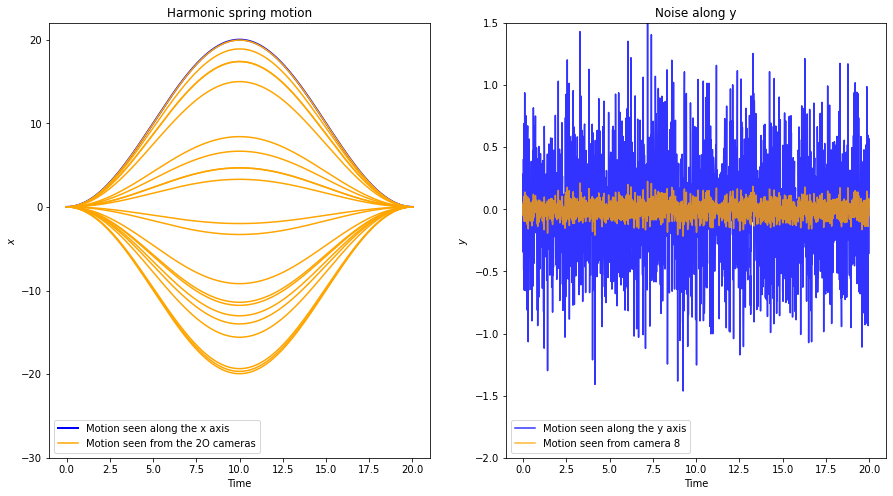

In [131]:
#Set cameras measurements along x and y axes
N = 2000
mu_x = [5]
mu_y = [0]
sigma_1 = [[0.001]]
sigma_2 = [[0.2]]
w = 0.1*np.pi
t = np.linspace(0,20,2000)
phi = np.pi
a = 10

#Motion along x and y axes seen by an observer
observer_x = a*np.cos(w*t-phi)+10.0
observer_y = np.random.multivariate_normal(mu_y, sigma_2, N).reshape(2000,) 
camera = pd.DataFrame({'x':observer_x,'y':observer_y})

#Motion along x and y axes seen by N cameras in (𝜃𝑖,𝜙𝑖)
theta = np.random.uniform(low=-2*np.pi, high=2*np.pi, size=(2,2000))


# motion along x and y as seen by the N cameras and deviated by (𝜃𝑖,𝜙𝑖):
N = 20
deviated_x = np.empty((2000,N))
deviated_y = np.empty((2000,N))
for x in range(20):
    for i in range(2000):
        deviated_x [i,x] = observer_x[i]*np.sin(theta[0,x])
        deviated_y[i,x] = observer_y[i]*np.cos(theta[1,x])
        

#PCA analysis
covmatrix=np.cov(deviated_x.T)
l, V = np.linalg.eig(covmatrix) #eigenvalues l and eigenvectors v

U, spectrum, Vt = np.linalg.svd(covmatrix)
l_svd = spectrum
V_svd = U

Lambda = np.diag(spectrum)
print ("\nThe lambda trace is: ", Lambda.trace())
print ("\nThe variability of the first component is: ",Lambda[0,0]/Lambda.trace())        
        
        
#Plot results      
fig = plt.figure(figsize=(15, 8))
plot_observer_x = fig.add_subplot(1,2,1)


# plot of the motion along x seen by an observer on the x axis:
plt.plot(t,camera['x'], c='blue', label='Motion seen along the x axis',linewidth=2.0)
plt.title('Harmonic spring motion')
plt.xlabel('Time')
plt.ylabel('$x$')
plt.ylim(-30,22)


# plot of the motion along x seen by an observer on x and y:
plt.plot(t,deviated_x[:,1], c='orange',label='Motion seen from the 2O cameras')
plt.plot(t,deviated_x[:,:], c='orange')
plt.legend()


plot_observer_y = fig.add_subplot(1,2,2)
# Motion along x seen by an observer on x and y:
plt.plot(t,camera['y'], c='blue', label='Motion seen along the y axis', alpha=0.8)

# Motion along camera 8 seen by an observer on x and y:
plt.plot(t,deviated_y[:,8], c='orange',label='Motion seen from camera 8', alpha=0.8)


plt.title('Noise along y')
plt.xlabel('Time')
plt.ylabel('$y$')
plt.ylim(-2,1.5)
plt.legend()

print('\nFrom multiple tests I noticed that the noise along the y axis is random and does not depend on the chosen observer')



4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [155]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 

--2020-11-30 13:13:32--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
Risoluzione di archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connessione a archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 200 OK
Lunghezza: 1477391 (1,4M) [application/x-httpd-php]
Salvataggio in: "/Users/claudianegrato/data/magic04.data"

magic04.data        100%[===================>]   1,41M   335KB/s    in 4,3s    

2020-11-30 13:13:37 (335 KB/s) - "/Users/claudianegrato/data/magic04.data" salvato [1477391/1477391]

--2020-11-30 13:13:38--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names
Risoluzione di archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connessione a archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 200 OK
Lunghezza: 5400 (5,3K) [application/x-httpd-php]
Salvataggio 

In [156]:
import pandas as pd
data = pd.read_csv('/Users/claudianegrato/data/magic04.data', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [157]:
# The last column is either a signal gamma (g) or background (h)
signal = data.loc[data[10]=='g',:9]
# Check the shape is 1Ox1O
signal.shape 

(12332, 10)

In [158]:
covmatrix = signal.cov()
l, V = np.linalg.eig(covmatrix)

print('The Eigenvalues are:\n',l)
print('\nThe Eigenvectors are:\n',V)

The Eigenvalues are:
 [5.5359e+03 1.6876e+03 9.8952e+02 3.7945e+02 2.6243e+02 1.8369e+02
 3.8636e+01 4.2567e-02 9.1682e-03 3.1302e-04]

The Eigenvectors are:
 [[-2.4329e-01 -1.1467e-01  3.5440e-01  3.7700e-01 -7.6620e-01  2.5536e-02
   2.6868e-01  4.3808e-03 -9.4519e-04  6.1007e-05]
 [-5.5385e-02 -4.7652e-02  9.1280e-02  9.4613e-02 -2.2440e-01 -2.2698e-02
  -9.6197e-01  3.3462e-02  4.4271e-04 -1.5829e-05]
 [-3.3475e-03 -3.3473e-03  5.4683e-03  6.5668e-03 -7.8477e-03 -3.3316e-04
  -2.9274e-02 -9.3349e-01 -3.5652e-01  2.1959e-02]
 [ 1.0656e-03  1.1561e-03 -1.9403e-03 -3.3865e-03  2.8804e-03  5.6632e-05
   9.0800e-03  3.0920e-01 -7.7672e-01  5.4862e-01]
 [ 6.0119e-04  6.7475e-04 -1.1140e-03 -1.9614e-03  1.6562e-03  2.7883e-05
   5.2282e-03  1.7844e-01 -5.1922e-01 -8.3578e-01]
 [ 1.1475e-01 -8.7096e-01 -4.6579e-01  2.9701e-02 -1.0037e-01  8.8581e-05
   1.8687e-02  4.7706e-04 -7.2088e-05 -4.8323e-06]
 [-1.7884e-01 -4.6617e-01  7.4047e-01 -3.2872e-01  3.0713e-01 -3.7540e-03
  -1.7913e-04  1.

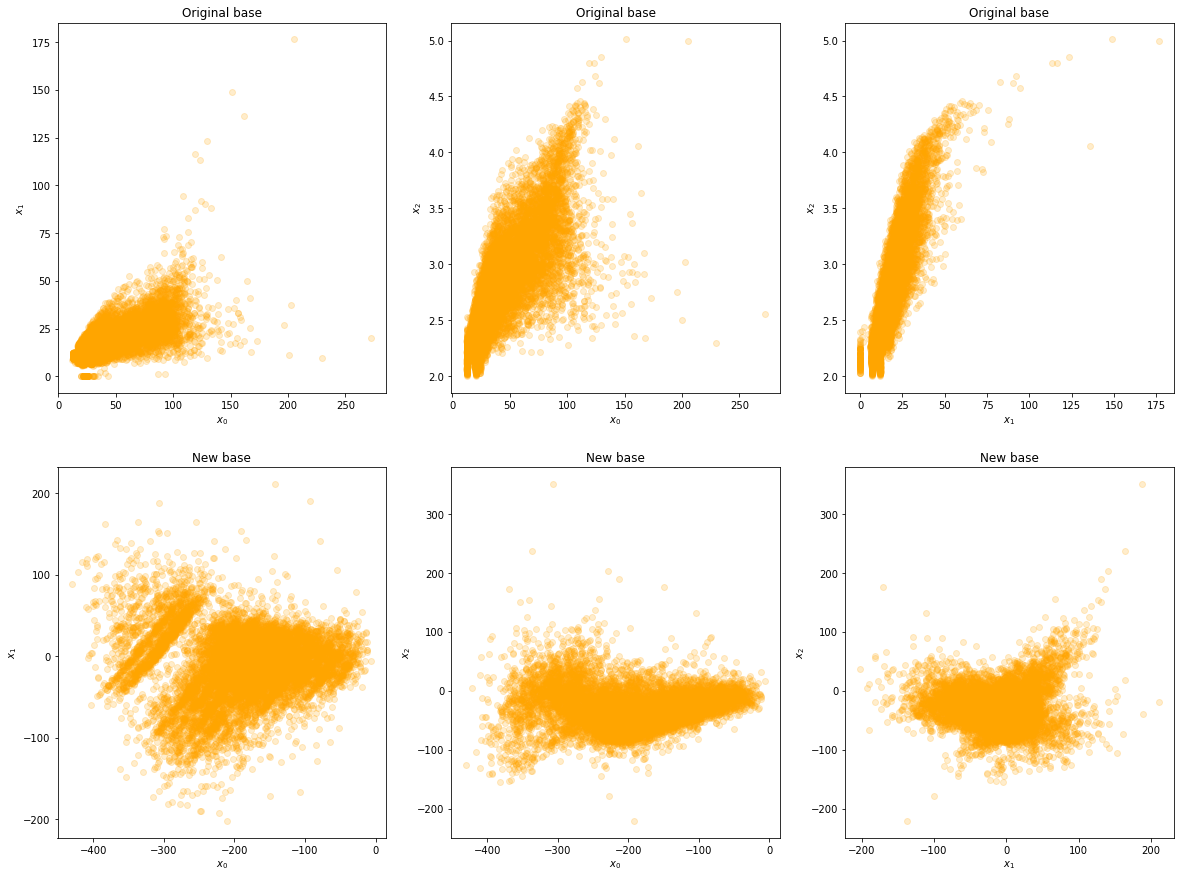

In [159]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))

Xp_reduced = np.dot(V.T, signal.values.T)

for col,(v1,v2) in enumerate(combinations([0,1,2], 2)):
    axes[0, col].scatter(signal.values.T[v1,:], signal.values.T[v2,:], alpha=0.2, c="orange")
    axes[0, col].set_xlabel('$x_{}$'.format(v1))
    axes[0, col].set_ylabel('$x_{}$'.format(v2))
    axes[0, col].set_title('Original base')
    
for col,(v1,v2) in enumerate(combinations([0,1,2], 2)):
    axes[1, col].scatter(Xp_reduced[v1,:], Xp_reduced[v2,:], alpha=0.2, c="orange")
    axes[1, col].set_xlabel('$x_{}$'.format(v1))
    axes[1, col].set_ylabel('$x_{}$'.format(v2))
    axes[1, col].set_title('New base')  